In [1]:
import pickle
import numpy as np
import pandas as pd

# Read info.txt

In [2]:
base_folder = '/home/zhi/Datasets/beam_direction/img_theta_x/'

In [3]:
label_path = base_folder+'info.txt'

In [4]:
labels = pd.read_table(label_path)

Play ground

In [9]:
labels[:5]

,name0,value0,name1,value1
0,theta,0,xpos,0
1,theta,0,xpos,1
2,theta,0,xpos,2
3,theta,0,xpos,3
4,theta,0,xpos,4


In [21]:
labels['value1'][5]

5

In [13]:
np.array(labels['value1'][:5])

array([0, 1, 2, 3, 4])

In [22]:
labels.shape

(10000, 4)

In [23]:
labels.shape[0]

10000

In [19]:
'begin'+str(32)+'end'

'begin32end'

In [17]:
s = 'begin'

# create image paths

In [5]:
img_paths = []
for theta,xpos in zip(labels['value0'],labels['value1']):
    img_paths.append(base_folder+'img_'+str(theta)+'_'+str(xpos)+'.png')

In [6]:
img_paths[:5]

['/home/zhi/Datasets/beam_direction/img_theta_x/img_0_0.png',
 '/home/zhi/Datasets/beam_direction/img_theta_x/img_0_1.png',
 '/home/zhi/Datasets/beam_direction/img_theta_x/img_0_2.png',
 '/home/zhi/Datasets/beam_direction/img_theta_x/img_0_3.png',
 '/home/zhi/Datasets/beam_direction/img_theta_x/img_0_4.png']

# Read images

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

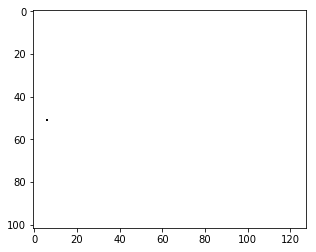

In [8]:
img = Image.open(img_paths[-1])
img = img.crop((img.size[0]*0.3, img.size[1]*0.3, img.size[0]*0.7, img.size[1]*0.7))
#img.show()
plt.figure()
plt.imshow(img)

In [9]:
img.size

(128, 102)

In [99]:
img.show()

In [100]:
img.getextrema()

(0, 2118)

In [10]:
float_img = np.array(img)/65535.0

In [11]:
float_img.max()

0.017761501487754634

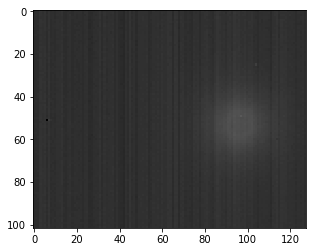

In [12]:
plt.figure()
plt.imshow(float_img, vmin=0,vmax=0.05, cmap='gray')

In [13]:
float_img.shape

(102, 128)

In [85]:
float_img.flatten().shape

(81920,)

In [109]:
float_img.flatten().shape

(13056,)

# Build Dataset

In [14]:
X = np.zeros([len(img_paths),len(float_img.flatten())])
Y = np.zeros([len(img_paths),2])

for i in range(len(img_paths)):
#for i in range(5):
    if i%200 ==0:
        print(i)
    theta = labels['value0'][i]
    xpos = labels['value1'][i]
    raw_image = Image.open(img_paths[i])
    #print(raw_image.size)
    croped_image = raw_image.crop((raw_image.size[0]*0.3, raw_image.size[1]*0.3, raw_image.size[0]*0.7, raw_image.size[1]*0.7))
    #print(croped_image.size)
    float_image = np.array(croped_image)/65535.0
    X[i,:] = float_image.flatten()
    Y[i,:] = [theta,xpos]
#     if len(X) > 0:
#         X = np.concatenate((X,[float_image.flatten()]),axis=0)
#         Y = np.concatenate((Y,[[theta,xpos]]),axis=0)
#     else:
#         X = [float_image.flatten().copy()]
#         Y = [[theta,xpos]]

0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800


In [15]:
X.shape

(10000, 13056)

In [17]:
Y.shape

(10000, 2)

In [18]:
data = {'X':X,'Y':Y}

In [22]:
data_file = open(base_folder+'data.p','wb')
pickle.dump(data,data_file)
data_file.close()

In [23]:
data_file = open(base_folder+'data.p','rb')
data = pickle.load(data_file)
data_file.close()